In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

data = pd.read_csv('/kaggle/input/food-nutrition-dataset/FINAL FOOD DATASET/FOOD-DATA-GROUP5.csv')
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Exploración inicial de los datos
print(data.head())
print(data.info())
print(data.describe())

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                     food  Caloric Value    Fat  Saturated Fats  \
0  margarine with yoghurt             88    9.8             1.9   
1   sunflower seed butter             99    8.8             0.7   
2            hazelnut oil            120   13.6             1.0   
3       menhaden fish oil           1966  218.0            66.3   
4      cod liver fish oil            123   13.6             3.1   

   Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  Sugars  Protein  \
0                   5.6                   2.0          0.073     0.0    0.058   
1                   6.2                   1.6          3.700     1.7    2.800   
2                  10.6                   1.4          0.000     0.0    0.000   
3                  58.2                  74.5          0.000     0.0    0.000   
4                   6.4                   3.1          0.000     0.0    0.000   

   Dietary Fiber  ...  Calcium  Copper   Iron  Magnesium  Manganese  \
0            0.0  ...      2.8   0.001 

In [5]:
# Asignar valor a la columna 'Categoría' según el contenido de grasa
def categorize_fat(value):
    if value < 5:
        return 'Bajo en Grasas'
    elif 5 <= value <= 15:
        return 'Moderado en Grasas'
    else:
        return 'Alto en Grasas'

# Crear columna 'Categoría' con la respectiva etiqueta en base al contenido de grasa
data['Categoría'] = data['Fat'].apply(categorize_fat)

# Preparar los datos
X = data.drop(columns=['Caloric Value', 'food', 'Categoría'])
y = data['Categoría']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
                    precision    recall  f1-score   support

    Alto en Grasas       0.73      1.00      0.84         8
    Bajo en Grasas       1.00      0.99      1.00       112
Moderado en Grasas       0.96      0.88      0.92        25

          accuracy                           0.97       145
         macro avg       0.89      0.96      0.92       145
      weighted avg       0.98      0.97      0.97       145



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


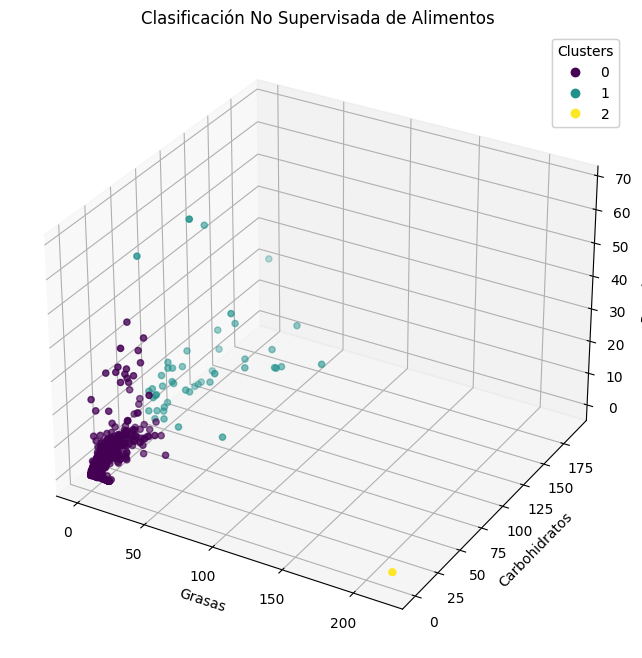

In [6]:
# Preparar los datos
X = data[['Fat', 'Carbohydrates', 'Protein']]  # Selecciona las características relevantes

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Agregar los clusters al DataFrame
data['Cluster'] = clusters

# Visualizar los clusters en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Fat'], data['Carbohydrates'], data['Protein'], c=data['Cluster'], cmap='viridis')

# Etiquetas y título
ax.set_xlabel('Grasas')
ax.set_ylabel('Carbohidratos')
ax.set_zlabel('Proteínas')
ax.set_title('Clasificación No Supervisada de Alimentos')

# Agregar barra de color
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()